Back to the main [Index](../index.ipynb)

### SED-ML L1V2 specification example
Repressilator example which demonstrates the use of phrasedml with URN examples. 

The examples are the reference examples from the SED-ML specification document available from http://sed-ml.sourceforge.net/documents/sed-ml-L1V2.pdf (Introduction Section).

INFO:root:Initialising BioModels service (WSDL)
INFO:root:Initialising BioModels service (WSDL)


read SEDML-File


INFO:root:Initialising BioModels service (WSDL)


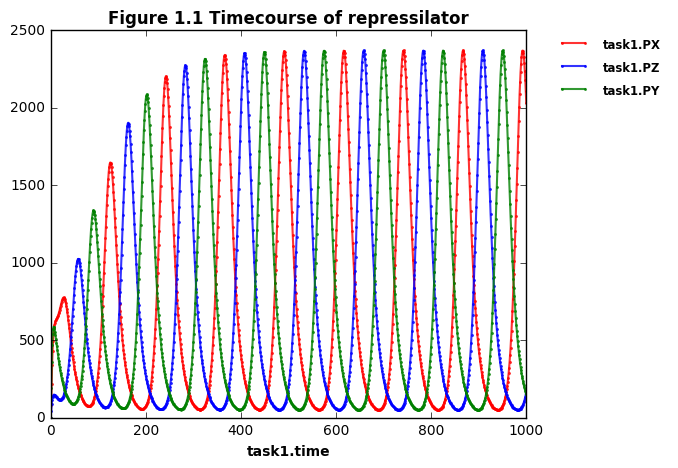

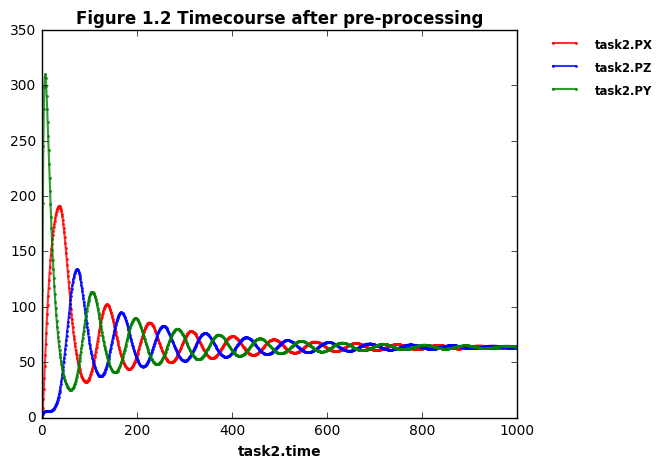

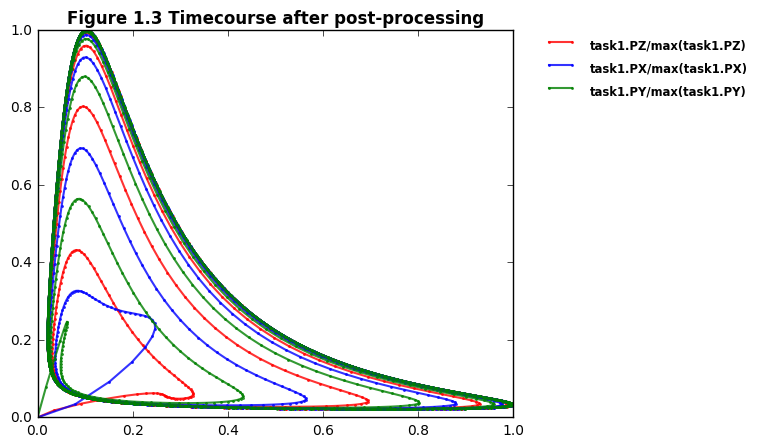

In [2]:
%matplotlib inline
from __future__ import print_function
import tellurium as te
import phrasedml

# Get SBML from URN and set for phrasedml
urn = "urn:miriam:biomodels.db:BIOMD0000000012"
sbmlStr = te.temiriam.getSBMLFromBiomodelsURN(urn=urn)
phrasedml.setReferencedSBML(urn, sbmlStr)

# <SBML species>
#   PX - LacI protein
#   PY - TetR protein
#   PZ - cI protein
#   X - LacI mRNA
#   Y - TetR mRNA
#   Z - cI mRNA

# <SBML parameters>
#   ps_a - tps_active: Transcrition from free promotor in transcripts per second and promotor
#   ps_0 - tps_repr: Transcrition from fully repressed promotor in transcripts per second and promotor

phrasedmlStr = """
    model1 = model "{}"
    model2 = model model1 with ps_0=1.3E-5, ps_a=0.013
    sim1 = simulate uniform(0, 1000, 1000)
    task1 = run sim1 on model1
    task2 = run sim1 on model2

    # A simple timecourse simulation
    plot "Figure 1.1 Timecourse of repressilator" task1.time vs task1.PX, task1.PZ, task1.PY

    # Applying preprocessing
    plot "Figure 1.2 Timecourse after pre-processing" task2.time vs task2.PX, task2.PZ, task2.PY

    # Applying postprocessing
    plot "Figure 1.3 Timecourse after post-processing" task1.PX/max(task1.PX) vs task1.PZ/max(task1.PZ), \
                                                       task1.PY/max(task1.PY) vs task1.PX/max(task1.PX), \
                                                       task1.PZ/max(task1.PZ) vs task1.PY/max(task1.PY)
""".format(urn)

# convert to SED-ML
sedmlStr = phrasedml.convertString(phrasedmlStr)
if sedmlStr == None:
    print(phrasedml.getLastError())

# Run the SED-ML file with results written in workingDir
import tempfile
import shutil
workingDir = tempfile.mkdtemp(suffix="_sedml")
te.executeSEDML(sedmlStr, workingDir=workingDir)
shutil.rmtree(workingDir)

### Execute Combine Archive
Executing the SED-ML from a combine archive.

/home/mkoenig/git/tellurium/tellurium/tests/testdata/sedml/sedx/BIOMD0000000003.sedx
read SEDML-File
/home/mkoenig/git/tellurium/tellurium/tests/testdata/sedml/sedx/_te_BIOMD0000000003/BIOMD0000000003.sedx.xml


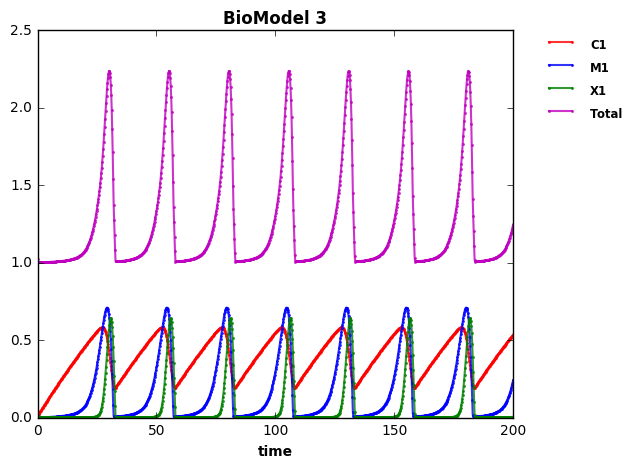

In [3]:
import tellurium as te
from tellurium.tests.testdata import sedxDir
import os
omexPath = os.path.join(sedxDir, "BIOMD0000000003.sedx")
print(omexPath)
te.executeSEDML(omexPath)

### phrasedml experiment
Tellurium provides support for simulation descriptions in SED-ML the export in Combine Archive format.

read SEDML-File
/tmp/tmpjB_fKl_sedml/_te_myModel/experiment1.xml


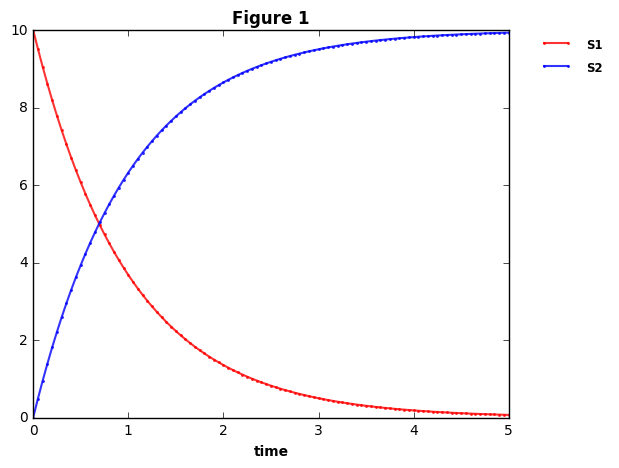

read SEDML-File
/tmp/tmpb5BEom_sedml/_te_myModel/experiment1.xml
"""
    tellurium 1.3.5

    auto-generated code
    sedmlDoc: L1V2  
    workingDir: /tmp/tmpb5BEom_sedml/_te_myModel
    inputType: COMBINE_FILE
"""
from __future__ import print_function, division
import tellurium as te
from roadrunner import Config
from tellurium.sedml.mathml import *
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import libsedml
import pandas
import os.path
Config.LOADSBMLOPTIONS_RECOMPILE = True

workingDir = r'/tmp/tmpb5BEom_sedml/_te_myModel'

# --------------------------------------------------------
# Models
# --------------------------------------------------------
# Model <model1>
model1 = te.loadSBMLModel(os.path.join(workingDir, 'myModel.xml'))

# --------------------------------------------------------
# Tasks
# --------------------------------------------------------
# Task <task1>
# Task: <task1>
task1 = [None]
model1.setIntegrator('cvode')
model1.timeCourse

In [4]:
import tellurium as te

antimony = '''
model myModel
  S1 -> S2; k1*S1
  S1 = 10; S2 = 0
  k1 = 1
end
'''

phrasedml = '''
  model1 = model "myModel"
  sim1 = simulate uniform(0, 5, 100)
  task1 = run sim1 on model1
  plot "Figure 1" time vs S1, S2
'''

# create an experiment
exp = te.experiment(antimony, phrasedml)
# execute it
exp.execute(phrasedml)
# print python code
exp.printPython(phrasedml)

### OneStep
Running a one step simulation.

read SEDML-File
/tmp/tmpYUwAyo_sedml/_te_oneStep/experiment1.xml


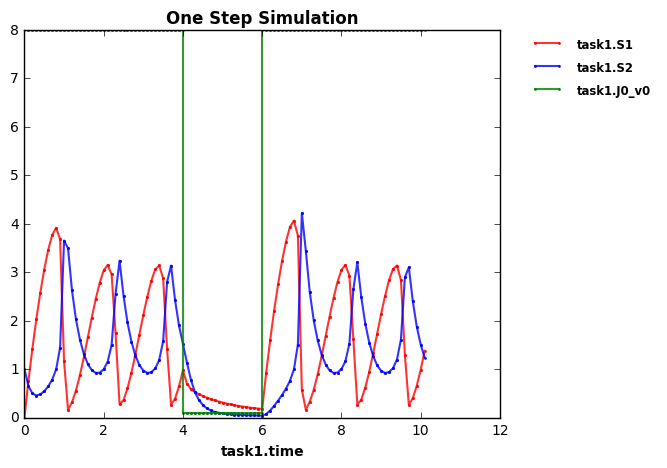

--------------------------------------------------------------------------------
report_1, Repeat: 0
--------------------------------------------------------------------------------
   task1.time  task1.S1  task1.S2  task1.J0_v0
0         0.0  0.000000  1.000000          8.0
1         0.1  0.745532  0.652365          8.0
2         0.1  0.745532  0.652365          8.0
3         0.2  1.417837  0.498244          8.0
4         0.2  1.417837  0.498244          8.0


In [5]:
import tellurium as te

antimonyStr = '''
// Created by libAntimony v2.9
model *oneStep()

// Compartments and Species:
compartment compartment_;
species S1 in compartment_, S2 in compartment_, $X0 in compartment_, $X1 in compartment_;
species $X2 in compartment_;

// Reactions:
J0: $X0 => S1; J0_v0;
J1: S1 => $X1; J1_k3*S1;
J2: S1 => S2; (J2_k1*S1 - J2_k_1*S2)*(1 + J2_c*S2^J2_q);
J3: S2 => $X2; J3_k2*S2;

// Species initializations:
S1 = 0;
S2 = 1;
X0 = 1;
X1 = 0;
X2 = 0;

// Compartment initializations:
compartment_ = 1;

// Variable initializations:
J0_v0 = 8;
J1_k3 = 0;
J2_k1 = 1;
J2_k_1 = 0;
J2_c = 1;
J2_q = 3;
J3_k2 = 5;

// Other declarations:
const compartment_, J0_v0, J1_k3, J2_k1, J2_k_1, J2_c, J2_q, J3_k2;
end
'''

phrasedmlStr = '''
model1 = model "oneStep"
stepper = simulate onestep(0.1)
task0 = run stepper on model1
task1 = repeat task0 for local.x in uniform(0, 10, 100), J0_v0 = piecewise(8, x<4, 0.1, 4<=x<6, 8)
plot "One Step Simulation" task1.time vs task1.S1, task1.S2, task1.J0_v0
report task1.time vs task1.S1, task1.S2, task1.J0_v0
'''

# phrasedml experiment
exp = te.experiment(antimonyStr, phrasedmlStr)
exp.execute(phrasedmlStr)

### parameterScan1D
One dimensional parameter scan.

read SEDML-File
/tmp/tmpoVlncf_sedml/_te_parameterScan1D/experiment1.xml


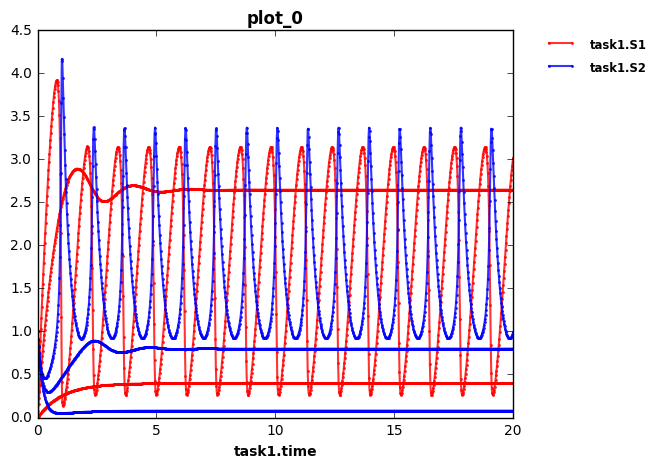

In [6]:
import tellurium as te

antimonyStr = '''
// Created by libAntimony v2.9
model *parameterScan1D()

// Compartments and Species:
compartment compartment_;
species S1 in compartment_, S2 in compartment_, $X0 in compartment_, $X1 in compartment_;
species $X2 in compartment_;

// Reactions:
J0: $X0 => S1; J0_v0;
J1: S1 => $X1; J1_k3*S1;
J2: S1 => S2; (J2_k1*S1 - J2_k_1*S2)*(1 + J2_c*S2^J2_q);
J3: S2 => $X2; J3_k2*S2;

// Species initializations:
S1 = 0;
S2 = 1;
X0 = 1;
X1 = 0;
X2 = 0;

// Compartment initializations:
compartment_ = 1;

// Variable initializations:
J0_v0 = 8;
J1_k3 = 0;
J2_k1 = 1;
J2_k_1 = 0;
J2_c = 1;
J2_q = 3;
J3_k2 = 5;

// Other declarations:
const compartment_, J0_v0, J1_k3, J2_k1, J2_k_1, J2_c, J2_q, J3_k2;
end
'''

phrasedmlStr = '''
model1 = model "parameterScan1D"
timecourse1 = simulate uniform(0, 20, 1000)
task0 = run timecourse1 on model1
task1 = repeat task0 for J0_v0 in [8, 4, 0.4], reset=true
plot task1.time vs task1.S1, task1.S2
'''

# phrasedml experiment
exp = te.experiment(antimonyStr, phrasedmlStr)
exp.execute(phrasedmlStr)

### parameterScan2D
2D parameter scan

read SEDML-File
/tmp/tmpSbJ3Uw_sedml/_te_parameterScan2D/experiment1.xml


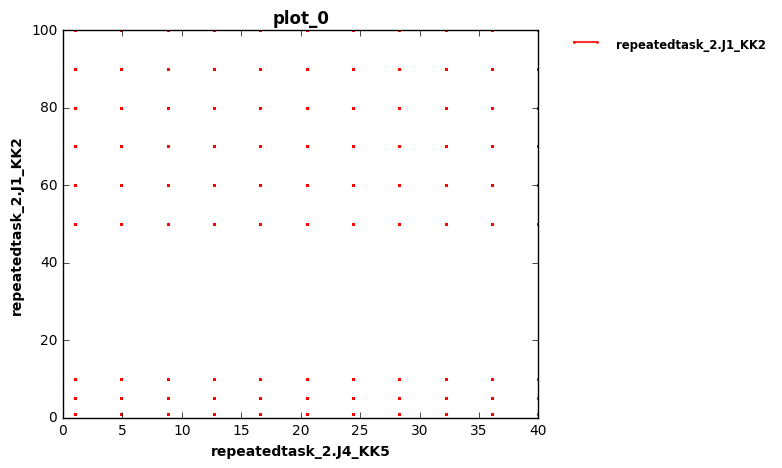

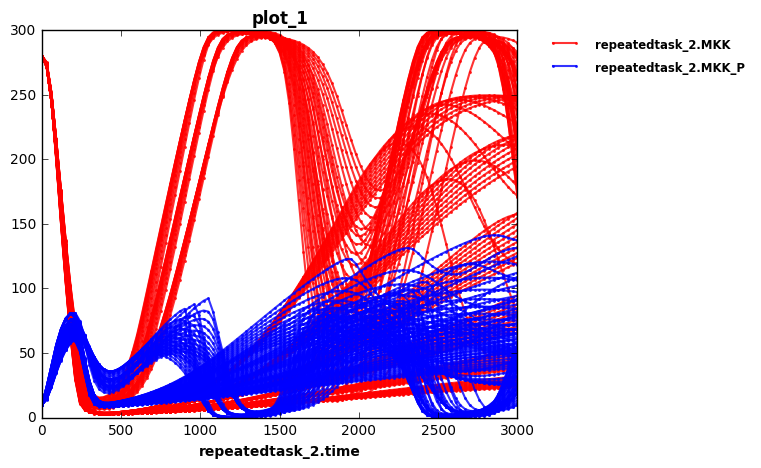

In [7]:
import tellurium as te

antimonyStr = '''
// Created by libAntimony v2.9
model *parameterScan2D()

  // Compartments and Species:
  compartment compartment_;
  species MKKK in compartment_, MKKK_P in compartment_, MKK in compartment_;
  species MKK_P in compartment_, MKK_PP in compartment_, MAPK in compartment_;
  species MAPK_P in compartment_, MAPK_PP in compartment_;

  // Reactions:
  J0: MKKK => MKKK_P; (J0_V1*MKKK)/((1 + (MAPK_PP/J0_Ki)^J0_n)*(J0_K1 + MKKK));
  J1: MKKK_P => MKKK; (J1_V2*MKKK_P)/(J1_KK2 + MKKK_P);
  J2: MKK => MKK_P; (J2_k3*MKKK_P*MKK)/(J2_KK3 + MKK);
  J3: MKK_P => MKK_PP; (J3_k4*MKKK_P*MKK_P)/(J3_KK4 + MKK_P);
  J4: MKK_PP => MKK_P; (J4_V5*MKK_PP)/(J4_KK5 + MKK_PP);
  J5: MKK_P => MKK; (J5_V6*MKK_P)/(J5_KK6 + MKK_P);
  J6: MAPK => MAPK_P; (J6_k7*MKK_PP*MAPK)/(J6_KK7 + MAPK);
  J7: MAPK_P => MAPK_PP; (J7_k8*MKK_PP*MAPK_P)/(J7_KK8 + MAPK_P);
  J8: MAPK_PP => MAPK_P; (J8_V9*MAPK_PP)/(J8_KK9 + MAPK_PP);
  J9: MAPK_P => MAPK; (J9_V10*MAPK_P)/(J9_KK10 + MAPK_P);

  // Species initializations:
  MKKK = 90;
  MKKK_P = 10;
  MKK = 280;
  MKK_P = 10;
  MKK_PP = 10;
  MAPK = 280;
  MAPK_P = 10;
  MAPK_PP = 10;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  J0_V1 = 2.5;
  J0_Ki = 9;
  J0_n = 1;
  J0_K1 = 10;
  J1_V2 = 0.25;
  J1_KK2 = 8;
  J2_k3 = 0.025;
  J2_KK3 = 15;
  J3_k4 = 0.025;
  J3_KK4 = 15;
  J4_V5 = 0.75;
  J4_KK5 = 15;
  J5_V6 = 0.75;
  J5_KK6 = 15;
  J6_k7 = 0.025;
  J6_KK7 = 15;
  J7_k8 = 0.025;
  J7_KK8 = 15;
  J8_V9 = 0.5;
  J8_KK9 = 15;
  J9_V10 = 0.5;
  J9_KK10 = 15;

  // Other declarations:
  const compartment_, J0_V1, J0_Ki, J0_n, J0_K1, J1_V2, J1_KK2, J2_k3, J2_KK3;
  const J3_k4, J3_KK4, J4_V5, J4_KK5, J5_V6, J5_KK6, J6_k7, J6_KK7, J7_k8;
  const J7_KK8, J8_V9, J8_KK9, J9_V10, J9_KK10;
end
'''

phrasedmlStr = '''
  model_3 = model "parameterScan2D"
  sim_repeat = simulate uniform(0,3000,100)
  task_1 = run sim_repeat on model_3
  repeatedtask_1 = repeat task_1 for J1_KK2 in [1, 5, 10, 50, 60, 70, 80, 90, 100], reset=true
  repeatedtask_2 = repeat repeatedtask_1 for J4_KK5 in uniform(1, 40, 10), reset=true
  plot repeatedtask_2.J4_KK5 vs repeatedtask_2.J1_KK2
  plot repeatedtask_2.time vs repeatedtask_2.MKK, repeatedtask_2.MKK_P
'''

# phrasedml experiment
exp = te.experiment(antimonyStr, phrasedmlStr)
exp.execute(phrasedmlStr)

### repeatedStochastic
Repeated stochastic simulation with setting seed.

read SEDML-File
/tmp/tmp76PWGb_sedml/_te_repeatedStochastic/experiment1.xml


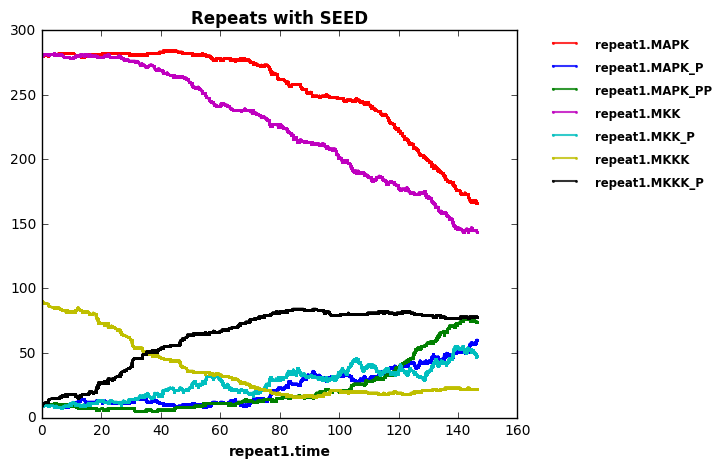

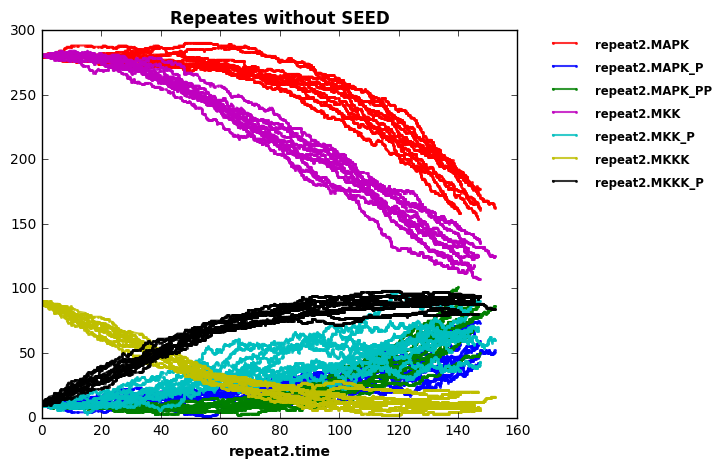

In [8]:
# -*- coding: utf-8 -*-
"""
phrasedml repeated stochastic test
"""
import tellurium as te

antimonyStr = '''
// Created by libAntimony v2.9
model *repeatedStochastic()

// Compartments and Species:
compartment compartment_;
species MKKK in compartment_, MKKK_P in compartment_, MKK in compartment_;
species MKK_P in compartment_, MKK_PP in compartment_, MAPK in compartment_;
species MAPK_P in compartment_, MAPK_PP in compartment_;

// Reactions:
J0: MKKK => MKKK_P; (J0_V1*MKKK)/((1 + (MAPK_PP/J0_Ki)^J0_n)*(J0_K1 + MKKK));
J1: MKKK_P => MKKK; (J1_V2*MKKK_P)/(J1_KK2 + MKKK_P);
J2: MKK => MKK_P; (J2_k3*MKKK_P*MKK)/(J2_KK3 + MKK);
J3: MKK_P => MKK_PP; (J3_k4*MKKK_P*MKK_P)/(J3_KK4 + MKK_P);
J4: MKK_PP => MKK_P; (J4_V5*MKK_PP)/(J4_KK5 + MKK_PP);
J5: MKK_P => MKK; (J5_V6*MKK_P)/(J5_KK6 + MKK_P);
J6: MAPK => MAPK_P; (J6_k7*MKK_PP*MAPK)/(J6_KK7 + MAPK);
J7: MAPK_P => MAPK_PP; (J7_k8*MKK_PP*MAPK_P)/(J7_KK8 + MAPK_P);
J8: MAPK_PP => MAPK_P; (J8_V9*MAPK_PP)/(J8_KK9 + MAPK_PP);
J9: MAPK_P => MAPK; (J9_V10*MAPK_P)/(J9_KK10 + MAPK_P);

// Species initializations:
MKKK = 90;
MKKK_P = 10;
MKK = 280;
MKK_P = 10;
MKK_PP = 10;
MAPK = 280;
MAPK_P = 10;
MAPK_PP = 10;

// Compartment initializations:
compartment_ = 1;

// Variable initializations:
J0_V1 = 2.5;
J0_Ki = 9;
J0_n = 1;
J0_K1 = 10;
J1_V2 = 0.25;
J1_KK2 = 8;
J2_k3 = 0.025;
J2_KK3 = 15;
J3_k4 = 0.025;
J3_KK4 = 15;
J4_V5 = 0.75;
J4_KK5 = 15;
J5_V6 = 0.75;
J5_KK6 = 15;
J6_k7 = 0.025;
J6_KK7 = 15;
J7_k8 = 0.025;
J7_KK8 = 15;
J8_V9 = 0.5;
J8_KK9 = 15;
J9_V10 = 0.5;
J9_KK10 = 15;

// Other declarations:
const compartment_, J0_V1, J0_Ki, J0_n, J0_K1, J1_V2, J1_KK2, J2_k3, J2_KK3;
const J3_k4, J3_KK4, J4_V5, J4_KK5, J5_V6, J5_KK6, J6_k7, J6_KK7, J7_k8;
const J7_KK8, J8_V9, J8_KK9, J9_V10, J9_KK10;
end
'''

phrasedmlStr = '''
model1 = model "repeatedStochastic"
timecourse1 = simulate uniform_stochastic(0, 4000, 1000)
timecourse1.algorithm.seed = 1003
timecourse2 = simulate uniform_stochastic(0, 4000, 1000)
task1 = run timecourse1 on model1
task2 = run timecourse2 on model1
repeat1 = repeat task1 for local.x in uniform(0, 10, 10), reset=true
repeat2 = repeat task2 for local.x in uniform(0, 10, 10), reset=true
plot "Repeats with SEED" repeat1.time vs repeat1.MAPK, repeat1.MAPK_P, repeat1.MAPK_PP, repeat1.MKK, repeat1.MKK_P, repeat1.MKKK, repeat1.MKKK_P
plot "Repeates without SEED" repeat2.time vs repeat2.MAPK, repeat2.MAPK_P, repeat2.MAPK_PP, repeat2.MKK, repeat2.MKK_P, repeat2.MKKK, repeat2.MKKK_P
'''

# phrasedml experiment
exp = te.experiment(antimonyStr, phrasedmlStr)
exp.execute(phrasedmlStr)

### Case 02
Perform repeated simulation after change of initial concentration to model.
Within every repeat the value of a parameter k1 is changed.
The model is reset after every repeat.

read SEDML-File
/tmp/tmpon8vPD_sedml/_te_case_02/experiment1.xml


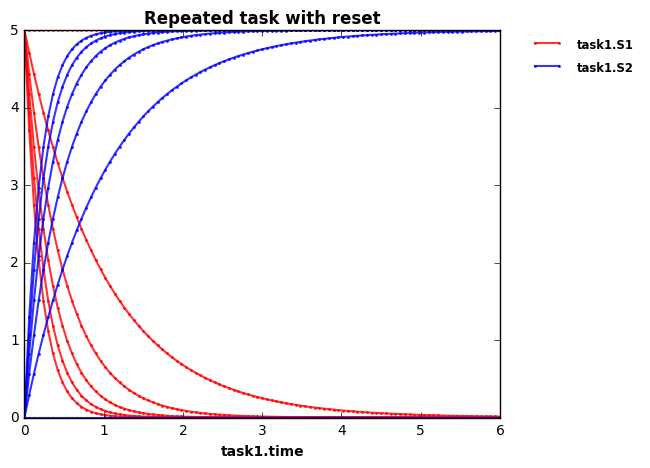

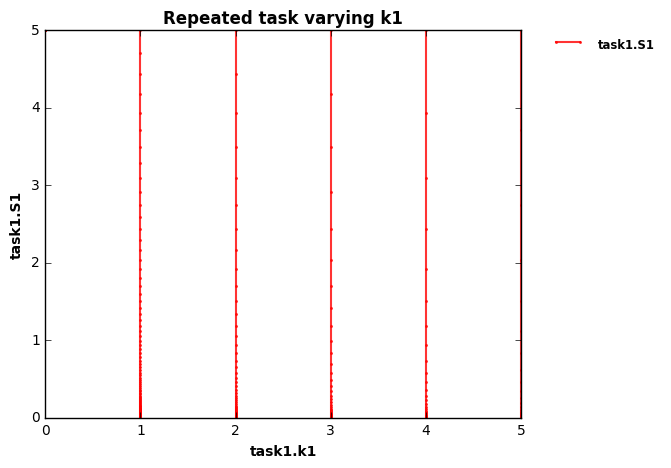

In [9]:
import tellurium as te

antimonyStr = """
model case_02
    J0: S1 -> S2; k1*S1;
    S1 = 10.0; S2=0.0;
    k1 = 0.1;
end
"""

phrasedmlStr = """
    model0 = model "case_02"
    model1 = model model0 with S1=5.0
    sim0 = simulate uniform(0, 6, 100)
    task0 = run sim0 on model1
    task1 = repeat task0 for k1 in uniform(0.0, 5.0, 5), reset = true
    plot "Repeated task with reset" task1.time vs task1.S1, task1.S2
    plot "Repeated task varying k1" task1.k1 vs task1.S1
    # report task1.time vs task1.S1, task1.S2
"""

# phrasedml experiment
exp = te.experiment(antimonyStr, phrasedmlStr)
exp.execute(phrasedmlStr)

### outputPlot3D
Oscillations of MAPK pathway.

read SEDML-File
/tmp/tmp1heLDI_sedml/_te_case_09/experiment1.xml


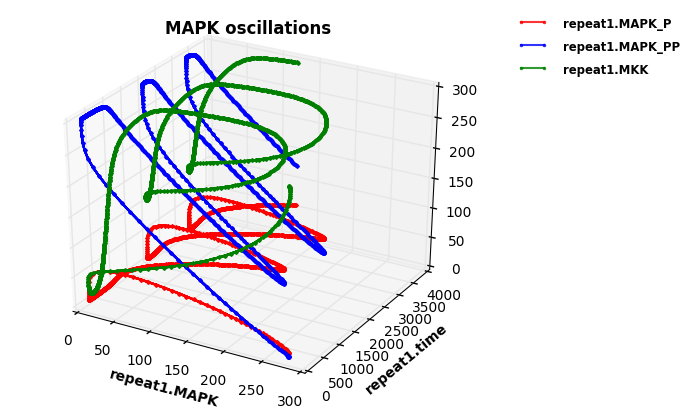

In [10]:
import tellurium as te

antimonyStr = '''
// Created by libAntimony v2.9
model *case_09()

// Compartments and Species:
compartment compartment_;
species MKKK in compartment_, MKKK_P in compartment_, MKK in compartment_;
species MKK_P in compartment_, MKK_PP in compartment_, MAPK in compartment_;
species MAPK_P in compartment_, MAPK_PP in compartment_;

// Reactions:
J0: MKKK => MKKK_P; (J0_V1*MKKK)/((1 + (MAPK_PP/J0_Ki)^J0_n)*(J0_K1 + MKKK));
J1: MKKK_P => MKKK; (J1_V2*MKKK_P)/(J1_KK2 + MKKK_P);
J2: MKK => MKK_P; (J2_k3*MKKK_P*MKK)/(J2_KK3 + MKK);
J3: MKK_P => MKK_PP; (J3_k4*MKKK_P*MKK_P)/(J3_KK4 + MKK_P);
J4: MKK_PP => MKK_P; (J4_V5*MKK_PP)/(J4_KK5 + MKK_PP);
J5: MKK_P => MKK; (J5_V6*MKK_P)/(J5_KK6 + MKK_P);
J6: MAPK => MAPK_P; (J6_k7*MKK_PP*MAPK)/(J6_KK7 + MAPK);
J7: MAPK_P => MAPK_PP; (J7_k8*MKK_PP*MAPK_P)/(J7_KK8 + MAPK_P);
J8: MAPK_PP => MAPK_P; (J8_V9*MAPK_PP)/(J8_KK9 + MAPK_PP);
J9: MAPK_P => MAPK; (J9_V10*MAPK_P)/(J9_KK10 + MAPK_P);

// Species initializations:
MKKK = 90;
MKKK_P = 10;
MKK = 280;
MKK_P = 10;
MKK_PP = 10;
MAPK = 280;
MAPK_P = 10;
MAPK_PP = 10;

// Compartment initializations:
compartment_ = 1;

// Variable initializations:
J0_V1 = 2.5;
J0_Ki = 9;
J0_n = 1;
J0_K1 = 10;
J1_V2 = 0.25;
J1_KK2 = 8;
J2_k3 = 0.025;
J2_KK3 = 15;
J3_k4 = 0.025;
J3_KK4 = 15;
J4_V5 = 0.75;
J4_KK5 = 15;
J5_V6 = 0.75;
J5_KK6 = 15;
J6_k7 = 0.025;
J6_KK7 = 15;
J7_k8 = 0.025;
J7_KK8 = 15;
J8_V9 = 0.5;
J8_KK9 = 15;
J9_V10 = 0.5;
J9_KK10 = 15;

// Other declarations:
const compartment_, J0_V1, J0_Ki, J0_n, J0_K1, J1_V2, J1_KK2, J2_k3, J2_KK3;
const J3_k4, J3_KK4, J4_V5, J4_KK5, J5_V6, J5_KK6, J6_k7, J6_KK7, J7_k8;
const J7_KK8, J8_V9, J8_KK9, J9_V10, J9_KK10;
end
'''

phrasedmlStr = '''
  mod1 = model "case_09"
  # sim1 = simulate uniform_stochastic(0, 4000, 1000)
  sim1 = simulate uniform(0, 4000, 1000)
  task1 = run sim1 on mod1
  repeat1 = repeat task1 for local.x in uniform(0, 10, 10), reset=true
  plot "MAPK oscillations" repeat1.MAPK vs repeat1.time vs repeat1.MAPK_P, repeat1.MAPK vs repeat1.time vs repeat1.MAPK_PP, repeat1.MAPK vs repeat1.time vs repeat1.MKK
  # report repeat1.MAPK vs repeat1.time vs repeat1.MAPK_P, repeat1.MAPK vs repeat1.time vs repeat1.MAPK_PP, repeat1.MAPK vs repeat1.time vs repeat1.MKK
'''

# phrasedml experiment
exp = te.experiment(antimonyStr, phrasedmlStr)
exp.execute(phrasedmlStr)
